## <center>선형 회귀로는 왜 XOR 게이트를 해결할 수 없는지 코드로 알아보자. </center>    
> AND, OR 게이트는 잘 분류했지만, 한동안 XOR 게이트의 벽에 막혀 발전이 없었습니다.   
> 선형 회귀로는 도저히 이 문제를 해결할 수 없자 **multi layer** 아이디어로 비선형성을 가해서 딥러닝이 발전하게 됩니다.   
> 이번 실습은 **선형 회귀로 왜 XOR 게이트를 해결할 수 없는지 코드로 알아봅니다.**   

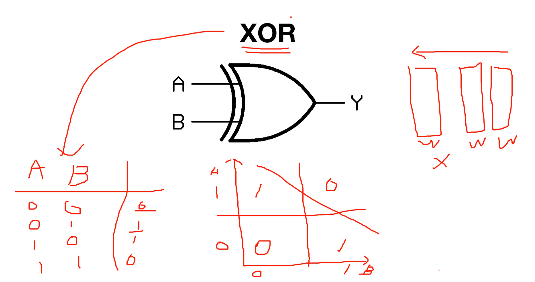

In [2]:
# Lab 9 XOR
import torch

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

### XOR 게이트 data

In [4]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [5]:
# nn layers
linear = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

In [6]:
# model
model = torch.nn.Sequential(linear, sigmoid).to(device) # 시그모이드 함수를 모델로 이용

In [7]:
# define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device) # 이진 분류이므로 바이너리 크로스 엔트로피 이용
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [8]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.7273974418640137
100 0.6931476593017578
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [9]:
# Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())


Hypothesis:  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Correct:  [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy:  0.5


## 200번 이후부터는 cost 값이 변하지 않음, ACCURACY 값도 0.5로 제대로 분류하지 못함
## 학습이 이뤄지지 않아 선형 회귀로는 해결할 수 없는 문제